In [63]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [64]:
# Load the dataset
df = pd.read_csv('student_habits_performance.csv')

# Preview the first few rows
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [65]:
# General info
df.info()

# Statistical summary
df.describe()

# Check column names
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [66]:
# Drop student ID columns
student_id_cols = [col for col in df.columns if 'student_id' in col]
df.drop(student_id_cols, axis=1, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values
print(df.isnull().sum())

# (Optional) Fill missing values (if any)
# Example: df['sleep_hours'].fillna(df['sleep_hours'].mean(), inplace=True)


age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [67]:
# Encode all categorical columns into numbers
df = pd.get_dummies(df, drop_first=True)

# Confirm all columns are now numeric
df.dtypes


age                                       int64
study_hours_per_day                     float64
social_media_hours                      float64
netflix_hours                           float64
attendance_percentage                   float64
sleep_hours                             float64
exercise_frequency                        int64
mental_health_rating                      int64
exam_score                              float64
gender_Male                                bool
gender_Other                               bool
part_time_job_Yes                          bool
diet_quality_Good                          bool
diet_quality_Poor                          bool
parental_education_level_High School       bool
parental_education_level_Master            bool
internet_quality_Good                      bool
internet_quality_Poor                      bool
extracurricular_participation_Yes          bool
dtype: object

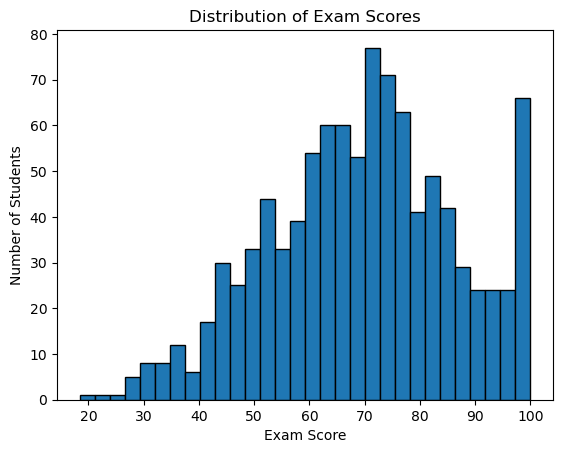

In [68]:
plt.hist(df['exam_score'], bins=30, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()


In [69]:
# Correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Show top correlations with exam_score
print(corr_matrix['exam_score'].sort_values(ascending=False))


exam_score                              1.000000
study_hours_per_day                     0.825419
mental_health_rating                    0.321523
exercise_frequency                      0.160107
sleep_hours                             0.121683
attendance_percentage                   0.089836
gender_Other                            0.012976
internet_quality_Poor                   0.003016
extracurricular_participation_Yes       0.000881
parental_education_level_High School   -0.002583
age                                    -0.008907
diet_quality_Good                      -0.010857
gender_Male                            -0.013191
part_time_job_Yes                      -0.026608
parental_education_level_Master        -0.040177
diet_quality_Poor                      -0.041602
internet_quality_Good                  -0.050804
social_media_hours                     -0.166733
netflix_hours                          -0.171779
Name: exam_score, dtype: float64


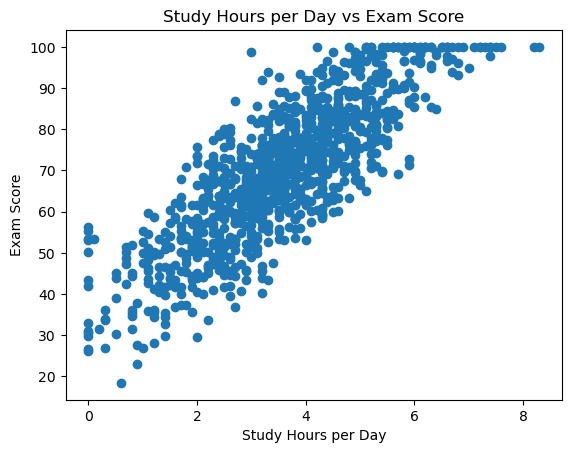

In [70]:
plt.scatter(df['study_hours_per_day'], df['exam_score'])
plt.title('Study Hours per Day vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()


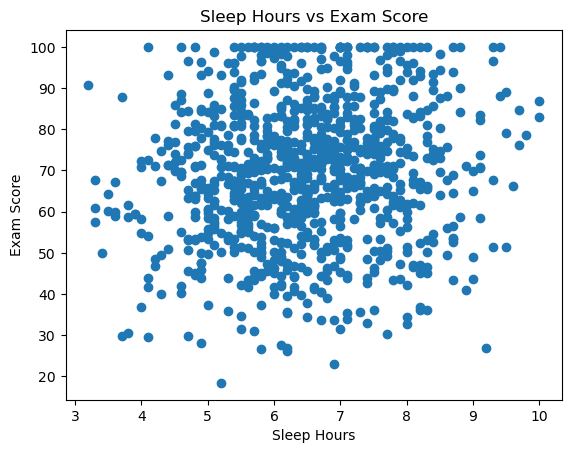

In [71]:
plt.scatter(df['sleep_hours'], df['exam_score'])
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


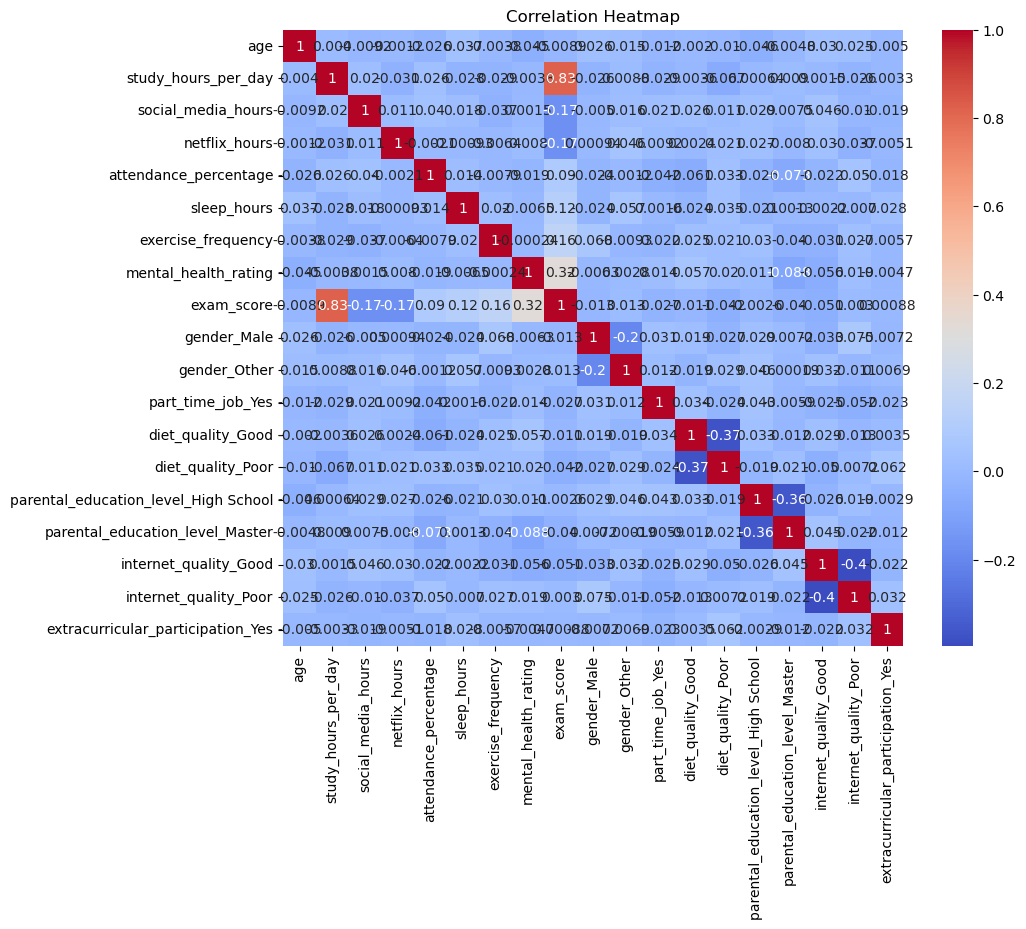

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


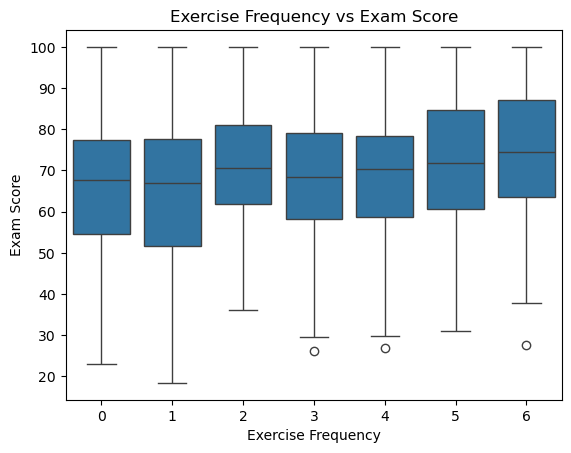

In [73]:
sns.boxplot(x='exercise_frequency', y='exam_score', data=df)
plt.title('Exercise Frequency vs Exam Score')
plt.xlabel('Exercise Frequency')
plt.ylabel('Exam Score')
plt.show()


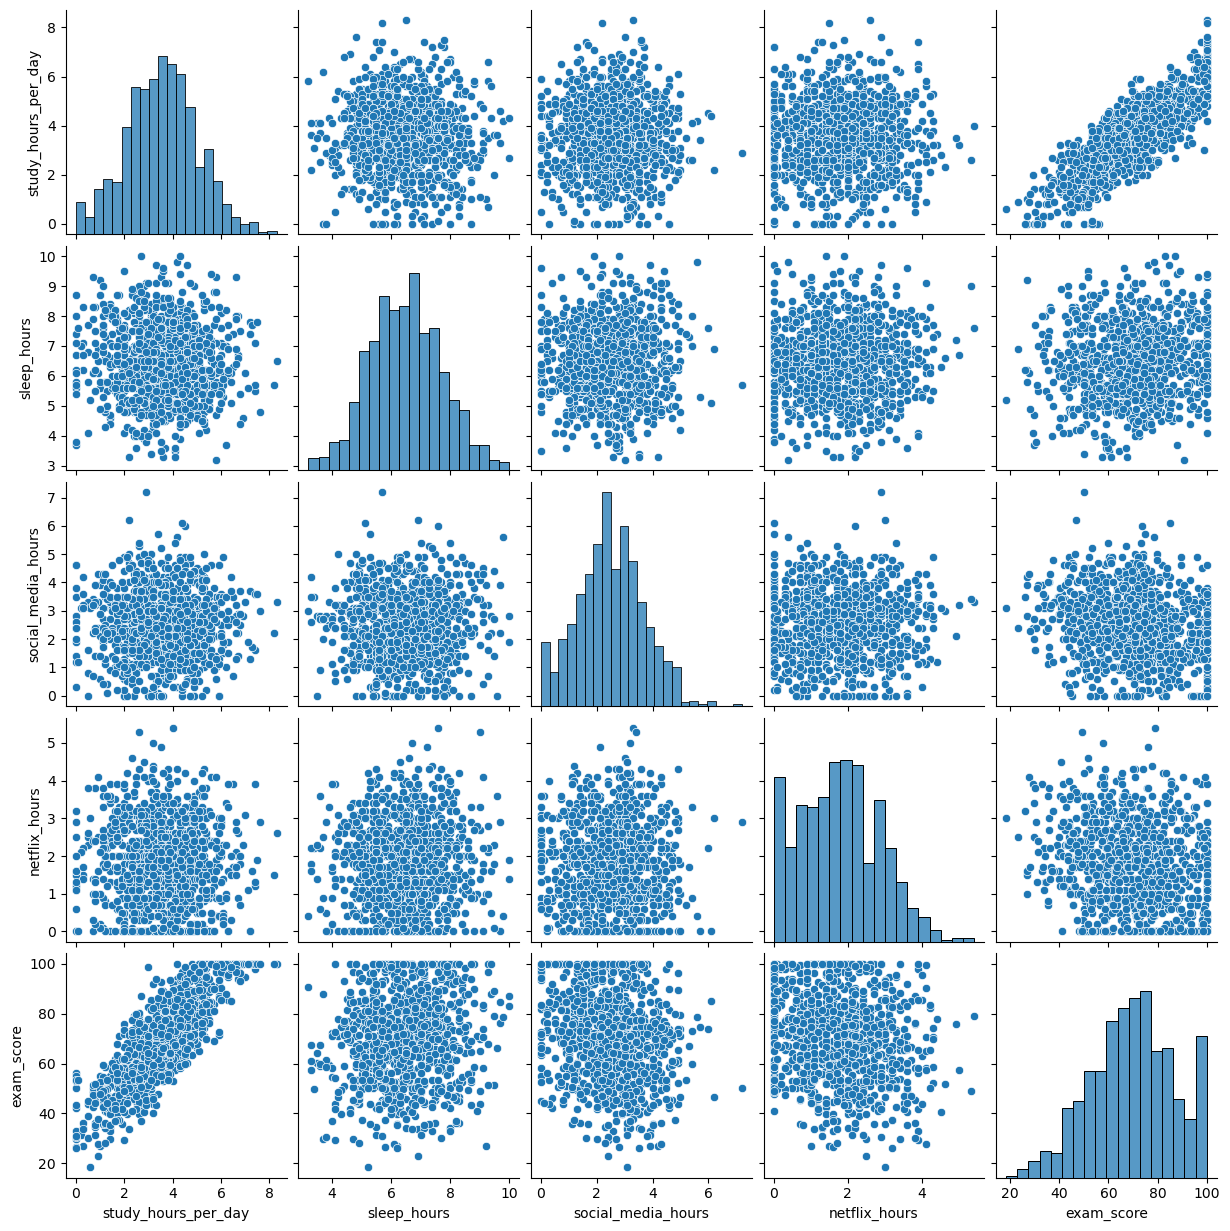

In [74]:
sns.pairplot(df[['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours', 'exam_score']])
plt.show()


In [75]:
# Separate features and target
X = df.drop('exam_score', axis=1)
y = df['exam_score']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
# Create and train Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [77]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 5.117396666666669
Mean Squared Error (MSE): 43.252402983333354
Root Mean Squared Error (RMSE): 6.576655911885109
R² Score: 0.844282182837262
